# Impacts of Loan Characterics on Borrower's APR
## by Nick Webb

## Preliminary Wrangling

> The Dataset contains 113,917 loans, each loan has information on each borrower's annual percentage rate (APR), status, borrowed amount, debt, etc. Variables with missing values were dropped to make the Dataset more accurate. Outliers were also removed to provide more reliable Data. This investigation will be analyzing factors that could influence borrower's APR and what loans were taken by what type of borrowers.

> The dataset can be download here: https://www.google.com/url?q=https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv&sa=D&ust=1547358770029000

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load the raw dataset
df_loan = pd.read_csv(r'C:\Users\NIWEBB\Desktop\NanoDegree\Project7\Project\prosperLoanData.csv')
df_loan.sample(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
11400,04C13599434217079754AEE,1102061,2013-12-29 18:39:22.483000000,NaN,36,Current,NaN,0.09469,0.0809,0.0709,...,0.00,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1
6232,08D7336979975142984CE06,40954,2006-09-20 22:06:03.180000000,B,36,Completed,2009-02-27 00:00:00,0.12700,0.1200,0.1150,...,-74.92,0.0,0.00,0.00,0.0,1.0,0,0,0.0,228
6789,A31635401325050648753E3,563800,2012-02-28 19:14:00.187000000,NaN,60,Past Due (31-60 days),NaN,0.25451,0.2293,0.2193,...,-249.90,-34.0,0.00,0.00,0.0,1.0,0,0,0.0,18
76381,CA5C355570252021239080A,627032,2012-08-21 10:35:23.533000000,NaN,36,Chargedoff,2013-03-31 00:00:00,0.33051,0.2909,0.2809,...,-6.63,0.0,3857.18,3857.18,0.0,1.0,0,0,0.0,34
32510,E4AD3598282394054ACC199,1105121,2013-12-30 12:15:05.240000000,NaN,36,Current,NaN,0.12081,0.0930,0.0830,...,-4.25,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1


In [3]:
# viewing the statistics
df_loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [4]:
# previewing the dataset
print(df_loan.shape)
print(df_loan.dtypes)

(113937, 81)
ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64


In [5]:
# Looking for duplicate data entries
sum(df_loan.duplicated())

0

In [6]:
# Looking for the number of null values in the dataset
df_loan.isnull().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

In [7]:
pd.set_option('display.max_column',None)
pd.set_option('display.max_row',None)

In [8]:
# Looking for the number of null values in the dataset
df_loan[df_loan['ProsperScore'].isnull()==True].head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.00,0.00,0.00,1.0,0,0,0.0,258
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.00,0.00,0.00,1.0,0,0,0.0,41
11,0F1734025150298088A5F2B,213551,2007-10-09 20:28:33.640000000,C,36,Completed,2008-01-07 00:00:00,0.15033,0.1325,0.1225,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Waiter/Waitress,Full-time,19.0,False,False,NaN,2007-10-08 13:13:44.363000000,640.0,659.0,2000-11-13 00:00:00,2.0,2.0,10.0,1,40.0,3.0,5.0,3.0,2224.0,1.0,0.0,0.0,1220.0,0.32,2580.0,7.0,0.40,0.0,0.27,"$1-24,999",True,1666.666667,F375340302234633830A957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,77,20907,1000,2007-10-18 00:00:00,Q4 2007,59423376541417552B94BD3,33.81,1011.65,1000.00,11.65,-0.88,0.0,0.00,0.00,0.00,1.0,0,0,0.0,53
17,0FDF336575182398852A8DC,31540,2006-08-15 12:21:09.433000000,AA,36,Chargedoff,2008-05-22 00:00:00,0.13202,0.1250,0.1175,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Professional,Not available,NaN,True,True,EF543365873906104DC9A04,2006-08-15 10:56:13.020000000,760.0,779.0,1990-05-19 00:00:00,NaN,NaN,36.0,16,346.0,7.0,17.0,2.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.12,Not displayed,True,5833.333333,51453366538336630763636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2239,1.0,91,2711,10000,2006-08-22 00:00:00,Q3 2006,893E3365582060699EBBADA,334.54,5325.33,3987.33,1338.00,-54.61,0.0,6012.65,6012.67,268.96,1.0,0,0,0.0,85
21,1017340630713945364DA6B,241498,2007-11-30 20:33:49.227000000,D,36,Complet

There are many columns with large amounts of null values and for that reason, could be excluded. Also, there seems to be some nulls in the "ProsperScore" column. This value is a custom risk score built using historical Prosper data and is an indicator for what the borrowers APR will be. For this reason, the records with ProsperScore null will be dropped.

In [9]:
# filtering out loans without ProsperScores
df_copy = df_loan[df_loan['ProsperScore'].isnull()==False]

In [10]:
# remove columns and columns with empty values that are not useful in the Dateset
df_copy.drop(['CreditGrade', 'GroupKey', 'LoanKey', 
                'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 
                'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 
                'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing', 
                'LoanFirstDefaultedCycleNumber'], axis=1, inplace = True)

C:\Users\NIWEBB\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


### What is the structure of your dataset?

> This dataset contains a total of 113,937 loans entries and 81 attributes. Each loan contains information on the borrower's background information and details regarding the loan.

### What is/are the main feature(s) of interest in your dataset?

> Using this dataset I will be investigating how borrowers characteristcs change over time and the Borrower's APR will be analyzied against many factors such as; the borrower's rating, score, occupation and income that could influence change in borrower's APR.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The Prosper Rating and score could correlate with a low Borrower's APR. One could assume the higher rating to reflect a more trustworthy customer. 

## Univariate Exploration


To get an understanding of our data, we will start by looking at the quantity of listings by state level.

In [11]:
# count of each state in the data
states_cnt = df_copy.BorrowerState.value_counts()

In [12]:
states_cnt.head()

CA    10761
NY     5844
TX     5634
FL     5406
IL     4264
Name: BorrowerState, dtype: int64

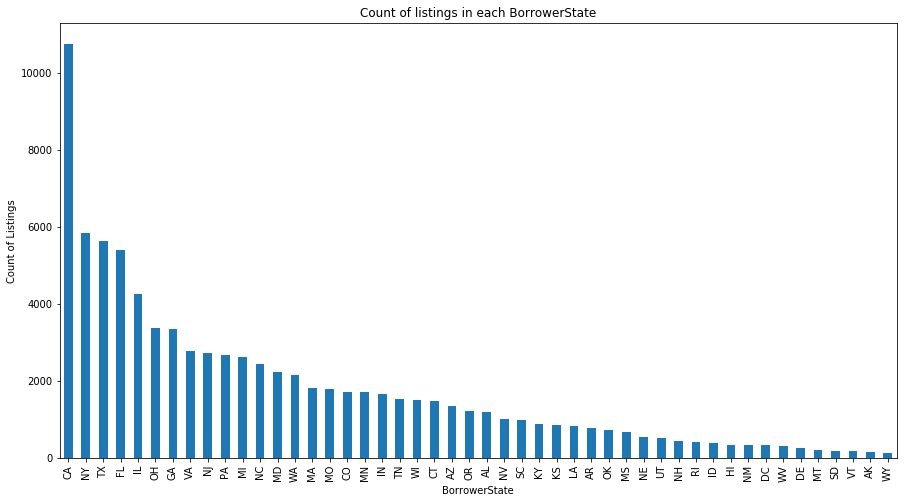

In [13]:
# plotting bar graph of Count of listings in each BorrowerState
color = sb.color_palette()[0]
plt.figure(figsize=(15, 8))
states_cnt.plot(kind='bar', color=color);

plt.title('Count of listings in each BorrowerState');
plt.xlabel('BorrowerState');
plt.ylabel('Count of Listings');
plt.xticks(rotation=90);

The states with the most borrowers are California, Texas, New York, and Florida. The interesting thing here is the fact that so many more of the listings came from California.

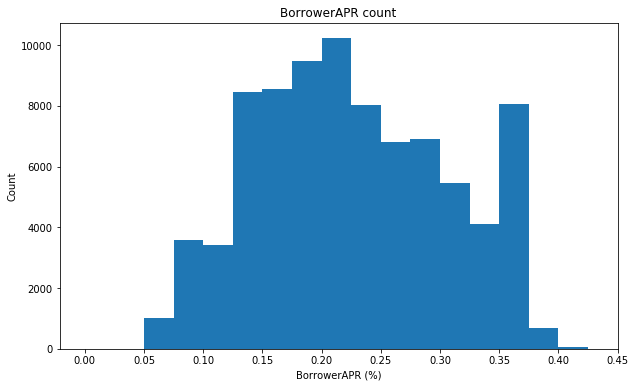

In [14]:
# see the counts for all BorrowerAPR values
plt.figure(figsize = (10, 6))
bins = np.arange(0, df_copy['BorrowerAPR'].max()+ 0.025, 0.025)
plt.hist(data = df_copy, x = 'BorrowerAPR', bins = bins)
plt.title('BorrowerAPR count')
plt.xlabel('BorrowerAPR (%)')
plt.ylabel('Count')
plt.xticks(np.arange(0, df_copy['BorrowerAPR'].max()+0.05, 0.05));

In [15]:
df_copy['BorrowerRate'].describe()

count    84853.000000
mean         0.196022
std          0.074631
min          0.040000
25%          0.135900
50%          0.187500
75%          0.257400
max          0.360000
Name: BorrowerRate, dtype: float64

The average interest rate on these loans is 19.6%, which is very high. The interests rates for the loans are almost as high as a credit card. Must figure out the reason for debt consolidation loan with a similair interest rate as a credit card.

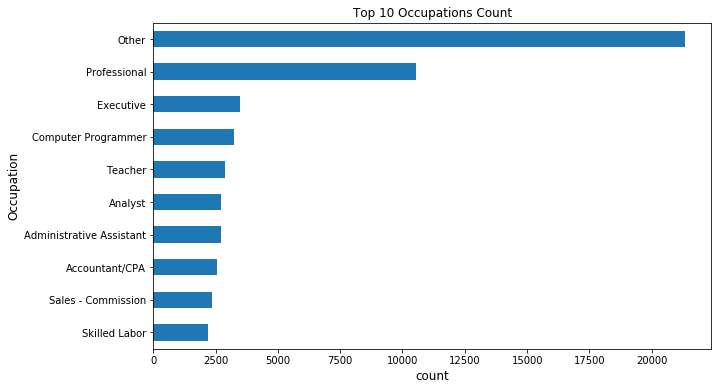

In [16]:
# The top 10 occupations of borrowers
df_copy['Occupation'].value_counts()[9::-1].plot(kind='barh', color =sb.color_palette()[0], figsize=(10,6))
plt.title('Top 10 Occupations Count')
plt.xlabel('count', fontsize=12)
plt.ylabel('Occupation', fontsize=12)
plt.fontsize = 20


It is no surprise that "Other" and "Professional" have the highest counts. Often, given the option, individuals would rather not disclose more information than necessary. 

In [17]:
borrower_mean_api = df_copy.groupby('Occupation').BorrowerAPR.mean()[9::-1]
borrower_mean_api.head()

Occupation
Civil Service    0.225464
Chemist          0.217413
Car Dealer       0.224016
Bus Driver       0.243542
Biologist        0.217704
Name: BorrowerAPR, dtype: float64

Text(0, 0.5, 'Occupation')

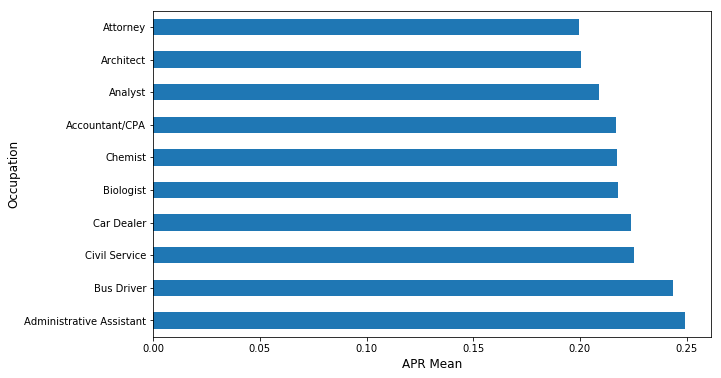

In [18]:
# Top 10 APR means by occupations
base_color = sb.color_palette()[0]
borrower_mean_api.sort_values(ascending=False).plot(kind='barh', color = base_color, figsize=(10,6),)
plt.xlabel('APR Mean', fontsize=12)
plt.ylabel('Occupation', fontsize=12)


Looking at the top 10 APR means by occupations, you would expect to see occupations with high incomes. Some of the more surprising occupations in this result are "Bus Driver" and "Car Dealer". But these occupations are not on our top 10 largest results, therefore the smaller samples could be the reason for the average APR's being small. Also, we know that there are many other variables that impact the borrowers APR and will investigate some of those in the upcoming visualizations. 

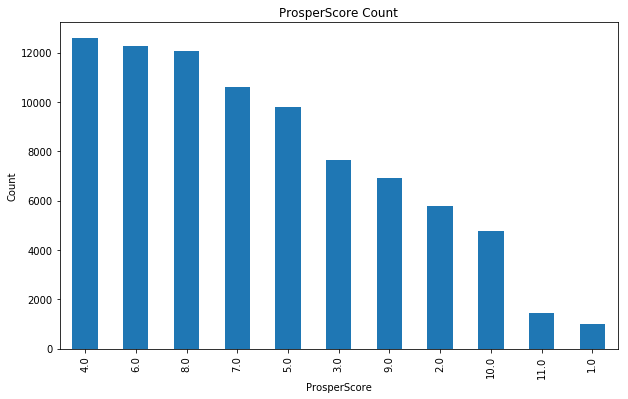

In [19]:
# see which ProsperScore borrowers received the most
df_copy['ProsperScore'].value_counts().plot(kind='bar', color = base_color, figsize=(10,6))
plt.title('ProsperScore Count')
plt.xlabel('ProsperScore')
plt.ylabel('Count')
plt.fontsize = 12
plt.figsize=(12,12)

In [20]:
df_copy['ProsperScore'].value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

By looking at the count by ProsperScore, we can see that the majority of borrowers are given a lower score.

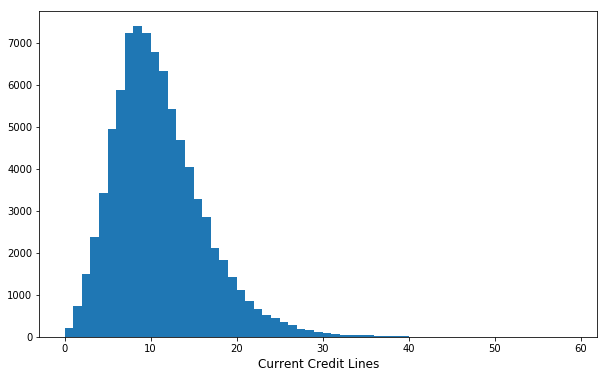

In [21]:
# plot current credit lines
plt.figure(figsize = (10, 6))
bins = np.arange(0, df_copy['CurrentCreditLines'].max() +1, 1)
plt.hist(data = df_copy, x = 'CurrentCreditLines', bins = bins)
plt.xlabel('Current Credit Lines', fontsize=12);


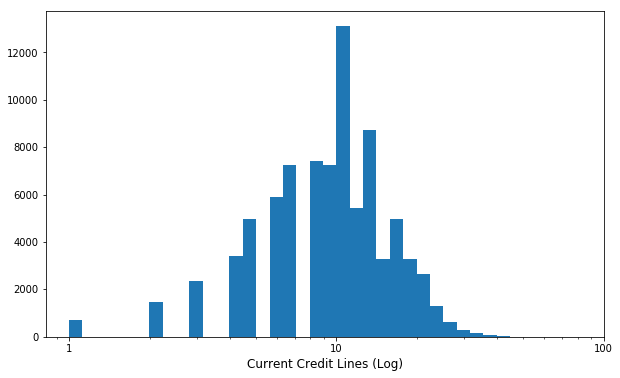

In [22]:
# there is a long tail distribution, let's put it in log scale

log_binsize = 0.05
bins = 10 **np.arange(0, np.log10(df_copy['CurrentCreditLines'].max()), log_binsize)

plt.figure(figsize = (10,6))
plt.hist(data = df_copy, x = 'CurrentCreditLines', bins = bins)
plt.xscale('log')
plt.xticks([1, 1e1, 1e2], [1, '10', '100'])
plt.xlabel('Current Credit Lines (Log)', fontsize=12)
plt.show();

The "current credit lines" variable was skewed to the right. I used a log transformation to see if the distribution would look more normal. This was in fact the case, but oddly enough, there were large spikes 10k, 15k, and 20k dollar mark.

In [23]:
# Checking the datatype for "IncomeRange" before using it. Most likely it is categorical and can be ordered in a relative order
df_copy['IncomeRange'].dtypes

dtype('O')

In [24]:
# plots the bar graph for each income range in a specific order
income_order = ['Not employed','$0 ','$1-24,999','$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']

ordered = pd.api.types.CategoricalDtype(ordered = True, categories = income_order)
df_copy['IncomeRange'] = df_copy['IncomeRange'].astype(ordered);


C:\Users\NIWEBB\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


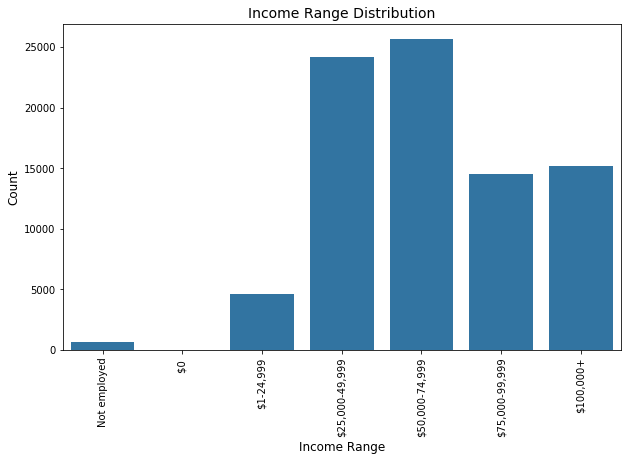

In [25]:
plt.figure(figsize=(10,6))
sb.countplot(data = df_copy, x = 'IncomeRange', color = base_color)
plt.title('Income Range Distribution', fontsize=14)
plt.xlabel('Income Range', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation = 90);

From the bar chart above, we can see the majority of the listings fall within the income range of $25,000-74999 . Plotting "IncomeRange" by count was informative to understand the typical income range of a Prosper borrower. A small change by defining the proper order really had a big visual impact. This gives a clear understanding that the majority of borrowers are in the middle class. This could be understood without the ordering, but the ordering allows the user to get the isight much easier.

## Bivariate Exploration

Lets compare the ProsperScore's against the credit scores. We are given the upper and lower range for credit scores, so we will find the median credit score and use that. Also, since we will have a somewhat quantitative variable "ProsperScore" and a qualitative variable "CreditScore", we can use a violin plot to compare their distributions.

In [26]:
df_copy["CreditScore"]=(df_copy["CreditScoreRangeUpper"] + df_copy["CreditScoreRangeLower"])/2

C:\Users\NIWEBB\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
df_copy["CreditScore"].head()

1    689.5
3    809.5
4    689.5
5    749.5
6    689.5
Name: CreditScore, dtype: float64

In [28]:
df_copy.drop(['CreditScoreRangeLower','CreditScoreRangeUpper'],axis=1, inplace = True);

C:\Users\NIWEBB\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


C:\Users\NIWEBB\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


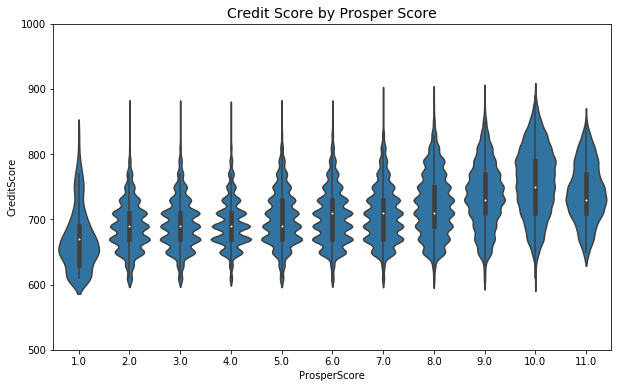

In [29]:
plt.figure(figsize=(10, 6))
sb.violinplot(x= 'ProsperScore', y ='CreditScore', data = df_copy, scale ='width', color = base_color )
plt.title('Credit Score by Prosper Score', fontsize=14)
plt.ylim(500,1000);

ProsperScores within the range of 2.0-8.0 tend to have a lot of variation within the distribution of the CreditScore. I am a little surprised that a ProsperScore of 1.0 does not have CreditScore's that fall near 500. But at the same time, Experian considers a score below 580 to be "bad credit."- https://www.experian.com/blogs/ask-experian/what-is-the-lowest-credit-score/

In [30]:
df_incomeRange = df_copy.IncomeRange.value_counts()
df_incomeRange

$50,000-74,999    25627
$25,000-49,999    24175
$100,000+         15205
$75,000-99,999    14498
$1-24,999          4654
Not employed        649
$0                    0
Name: IncomeRange, dtype: int64

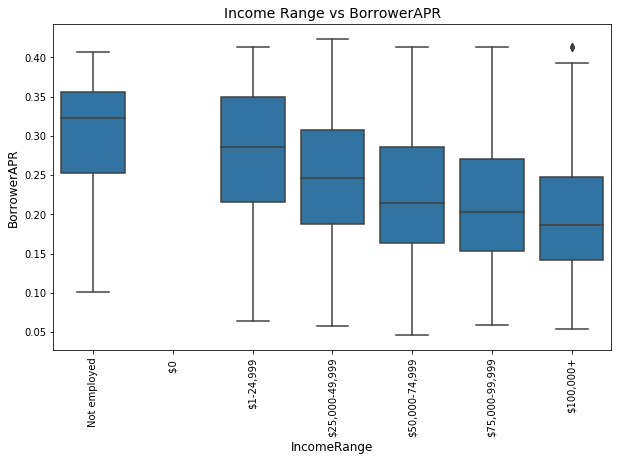

In [31]:
plt.figure(figsize=(10, 6))
# plots the boxplot
sb.boxplot(data = df_copy, x='IncomeRange', y='BorrowerAPR', color =base_color, order = income_order);

plt.title('Income Range vs BorrowerAPR', fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('BorrowerAPR', fontsize=12);
plt.xlabel('IncomeRange', fontsize=12);

The insights from the boxplot are the medians are in decreasing order i.e., the greater the income range the lower the BorrowerAPR. The points above the upper whisker indicates individual outlier points that are more than 1.5 times the IQR above the third quartile. The APR's for these points go into the 4.0+ range.

In [32]:
# Looking into the outliers
df_copy[df_copy['IncomeRange']=='$100,000+'].sort_values(by='BorrowerAPR',ascending=False).head()

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,DateCreditPulled,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,CreditScore
31674,C28B3497770334814890845,482674,2010-11-03 05:04:10.570000000,36,Chargedoff,2012-02-22 00:00:00,0.41355,0.35,0.34,0.1369,0.183,0.1369,1.0,HR,4.0,1,PA,Professional,Employed,192.0,True,False,2010-10-19 18:47:52,1993-01-01 00:00:00,9.0,8.0,37.0,4,47.0,2.0,13.0,4.0,26017.0,55.0,0.0,0.0,367.0,0.59,253.0,31.0,0.62,0.0,0.09,"$100,000+",True,9166.666667,869,40,45499,1000,2010-11-23 00:00:00,Q4 2010,EE82336592106428786731E,45.24,462.40,195.62,266.78,-7.63,0.0,804.38,804.38,0.0,1.0,0,0,0.0,40,669.5
91546,68EC35025821928350D9DA9,488380,2010-12-18 15:33:09.337000000,36,Completed,2012-03-20 00:00:00,0.41355,0.35,0.34,0.3199,0.240,0.0799,1.0,HR,3.0,1,AK,Skilled Labor,Employed,97.0,True,False,2010-12-18 15:33:06,1997-09-24 00:00:00,4.0,5.0,33.0,3,66.0,5.0,6.0,7.0,16128.0,65.0,0.0,0.0,326.0,0.34,624.0,23.0,0.51,2.0,0.06,"$100,000+",True,8833.333333,0,39,46282,1000,2010-12-28 00:00:00,Q4 2010,C1A9340699356463234B2C8,45.24,1250.65,999.65,251.00,-7.14,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1,649.5
18473,37A735019031281873636AA,486869,2010-12-05 17:30:54.257000000,36,Completed,2012-05-02 00:00:00,0.41355,0.35,0.34,0.0799,0.240,0.0799,1.0,HR,2.0,1,NY,Professional,Full-time,57.0,True,False,2010-12-05 17:30:47,1990-07-16 00:00:00,9.0,8.0,50.0,4,30.0,2.0,8.0,1.0,3956.0,21.0,0.0,0.0,343.0,0.00,0.0,40.0,0.77,0.0,0.09,"$100,000+",True,10833.333333,0,39,45967,1000,2010-12-15 00:00:00,Q4 2010,37B23406359465415BC6237,45.24,1413.18,1000.00,413.18,-11.83,0.0,0.00,0.00,0.0,1.0,0,0,0.0,23,669.5
8750,6F2934946298365730F50B9,476850,2010-09-24 16:21:20.063000000,36,Completed,2012-02-15 00:00:00,0.41355,0.35,0.34,0.1369,0.183,0.1369,1.0,HR,4.0,7,TX,Professional,Employed,90.0,True,False,2010-09-09 19:09:36,1996-11-13 00:00:00,26.0,24.0,62.0,17,1059.0,0.0,5.0,1.0,1329.0,0.0,0.0,0.0,41506.0,0.83,3878.0,37.0,0.94,1.0,0.27,"$100,000+",True,10500.000000,0,41,44670,1000,2010-10-06 00:00:00,Q4 2010,45FD3493828171164D5A3F7,45.24,1393.09,1000.01,393.08,-11.22,0.0,0.00,0.00,0.0,1.0,0,0,0.0,29,649.5
53614,D8993494833664242908FD4,475204,2010-09-10 14:55:14.930000000,36,Completed,2013-09-22 00:00:00,0.39275,0.33,0.32,0.0612,0.240,0.0612,1.0,HR,3.0,2,TX,Professional,Full-time,194.0,True,True,2010-08-28 15:17:22,1994-12-09 00:00:00,6.0,4.0,25.0,0,0.0,5.0,11.0,0.0,0.0,17.0,0.0,0.0,0.0,0.00,0.0,24.0,0.70,1.0,0.14,"$100,000+",True,8375.000000,0,42,44488,1000,2010-09-22 00:00:00,Q3 2010,CEAF338233230128738CD1B,0.00,1587.92,1000.00,587.92,-17.80,0.0,0.00,0.00,0.0,1.0,0,0,0.0,30,649.5


When looking at the corresponding data for the outliers above, we can see that the ProsperScores are between 2-4. The ProsperScore is noted as a custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score. Digging into why the ProsperScores are low, we can see that the top 3 records have 21-65 delinquencies within the last 7 years. The 4th records actually has 0 delinquincies within the past 7 years, but that listing has 26 current credit lines with a revolving credit balance of $41,506 which is significantly higher than the other account.

One thing to note is, this score was only applicable for loans originated after July 2009.

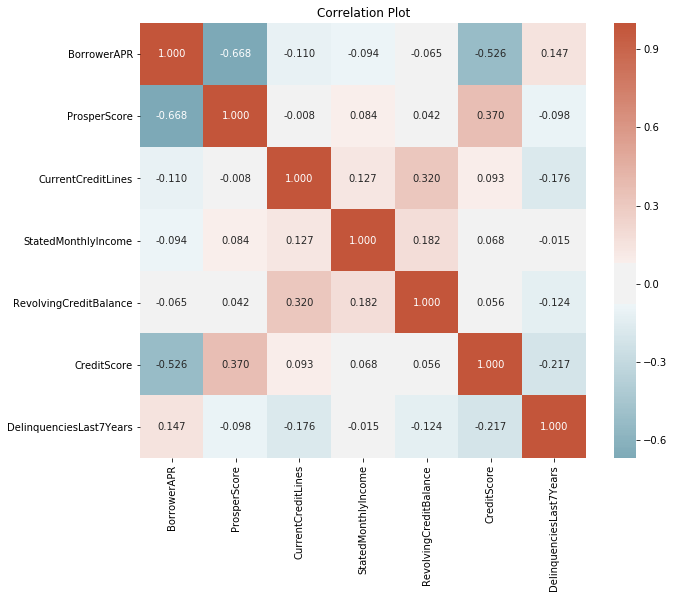

In [33]:
# correlation plot 
cmap = sb.diverging_palette(220, 20, sep=20, as_cmap=True)
num_vars = ['BorrowerAPR', 'ProsperScore', 'CurrentCreditLines', 
            'StatedMonthlyIncome', 'RevolvingCreditBalance', 'CreditScore','DelinquenciesLast7Years']

plt.figure(figsize = [10, 8])
sb.heatmap(df_copy[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = cmap, center = 0)
plt.title('Correlation Plot') 
plt.show()

The results from the correlation plot are a bit surprising as there were no strong positive relationships between any pairs. I was assuming that ProsperScore and DelinquenciesLast7Years would have a relatively high correlation with BorrowerAPR as these two veriables seemed likely to impact it. 

## Multivariate Exploration

To look deeper into this, we are going to analyze how the interest rate changed over years for Homeowners vs Non-Homeowners. A boxplot is used because it can be easily analyzed in a clean fashion. 

C:\Users\NIWEBB\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


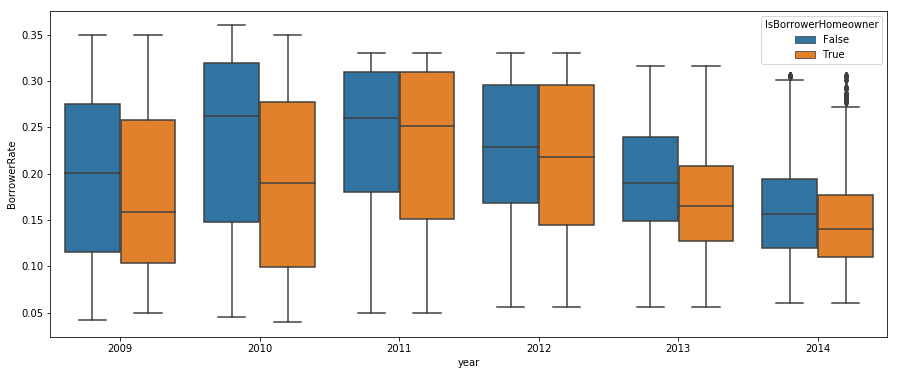

In [34]:
# Get the year from the creation date and create a column for it
df_copy['year'] = df_copy.ListingCreationDate.str.split('-').str[0]

# plots the boxplot to analyze homeowner's and non-homeowner's rate over years

b = sb.boxplot(data=df_copy, x='year', y='BorrowerRate', hue='IsBorrowerHomeowner');
b.figure.set_figwidth(15)
b.figure.set_figheight(6);

We can see that the borrower rate of a non-homewoner is typically higher than that of a homeowner. The interesting details in this plot is the trend of the homeowners rate. We can see that from 2009-2011 the homeowners interest rate continued to rise until it met the rate of non-homeowners. One thought to why this may have occured is the credit crisis that occurred from 2006–2007, which resulted in the bursting of the housing market. This definitely definitely increased homeowners interest rates. Prior to 2006, many homeowners were buying houses at high variable mortgage rates and when the market crashed, their houses greatly devalued. The bursting of the housing bubble is an important cause of the 2007–2009 recession in the United States and also caused foreclosure rates in 2006–2007 to greatly increase. This might not be the entire story but it would be worth investigating further.

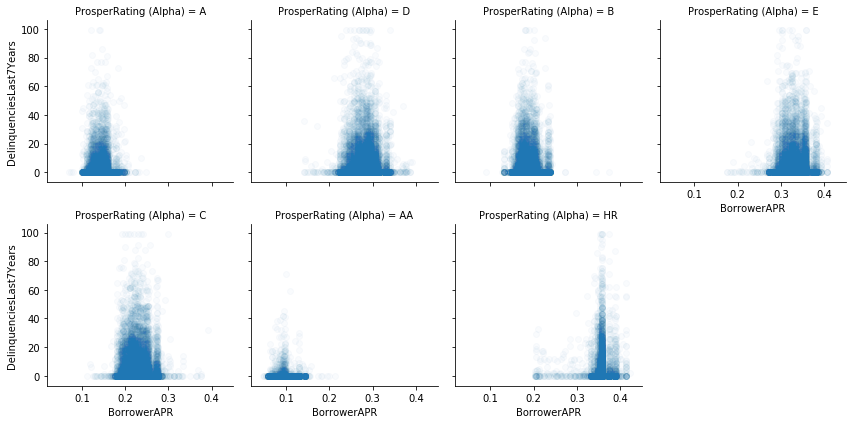

In [35]:
b = sb.FacetGrid(data = df_copy, col = 'ProsperRating (Alpha)', col_wrap = 4, height = 3)
b.map(plt.scatter, 'BorrowerAPR', 'DelinquenciesLast7Years', alpha = 0.025)
b.set_xlabels('BorrowerAPR')
b.set_ylabels('DelinquenciesLast7Years');


This FacetGrid visualization helps to analyze BorrowerAPR vs DelinquenciesLast7Years on difference letter ratings. The lowerest rating(HR) of borrowers have the highest APR, but not it isn't that much worse than listings with rating(E). For high rating A(A), the borrowers has the lowers APR. This scatterplot visualization is really only helpfull when reducing the opacity.

## Conclusion